In [2]:
import scipy.io
import numpy as np
import math
import matplotlib.pyplot as plt
f = scipy.io.loadmat('six.mat')
six = f["six"] # getting the matrix of data     

In [3]:
time = len(six[0])  # no. of time steps per trial
trials = len(six)   # no. of trials per stimulus orientation

In [5]:
bin_duration = 10 # in ms

n_bins = int( time / bin_duration )
bins_per_second = int(1000/bin_duration)

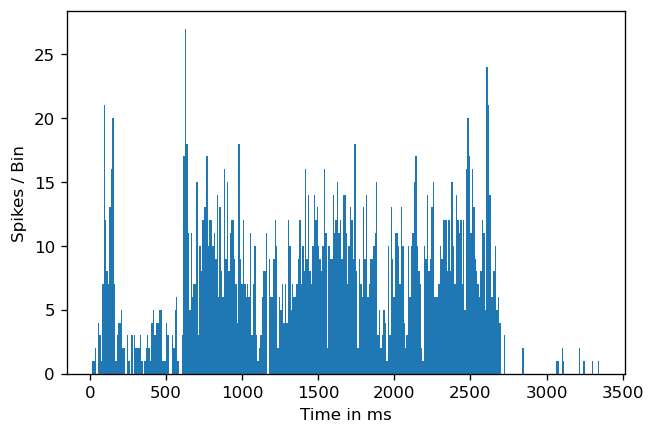

In [36]:
data1 = [] 

for trial in range(trials):   # getting time steps where spiking occurred
    for time_step in range(time):
        if six[trial][time_step] == 1:
            data1.append(time_step)

plt.figure(dpi=120)
plt.hist(data1, bins = n_bins)
plt.xlabel("Time in ms")
plt.ylabel("Spikes / Bin")
plt.show()

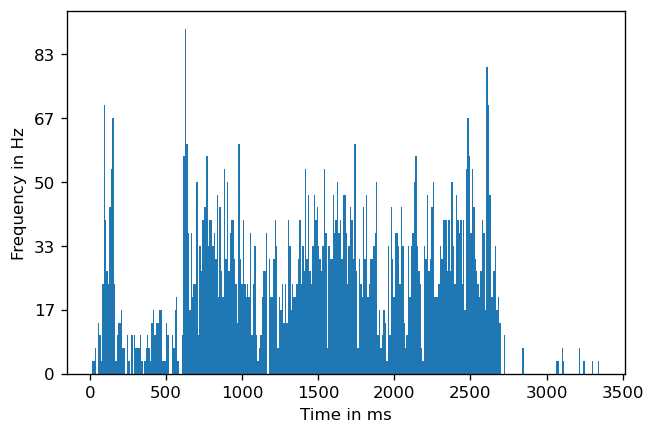

In [7]:
converted = []
y=[0,5,10,15,20,25]
for label in y:
    converted.append( round( (label * bins_per_second) / trials) ) 

plt.figure(dpi=120)
plt.hist(data1, bins = n_bins)
plt.xlabel("Time in ms")
plt.ylabel("Frequency in Hz")
plt.yticks(y,labels=converted)
plt.show()

## Spike Density Fuction

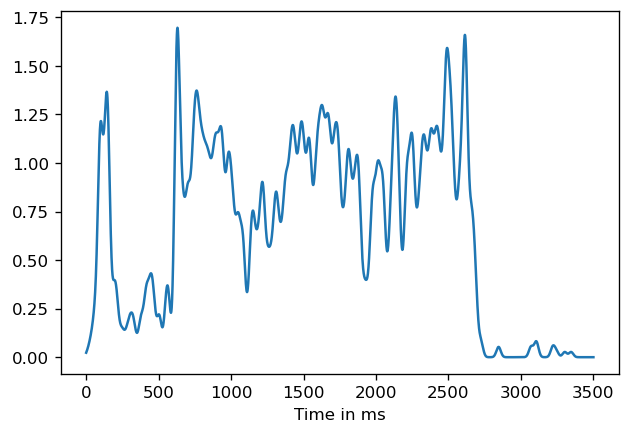

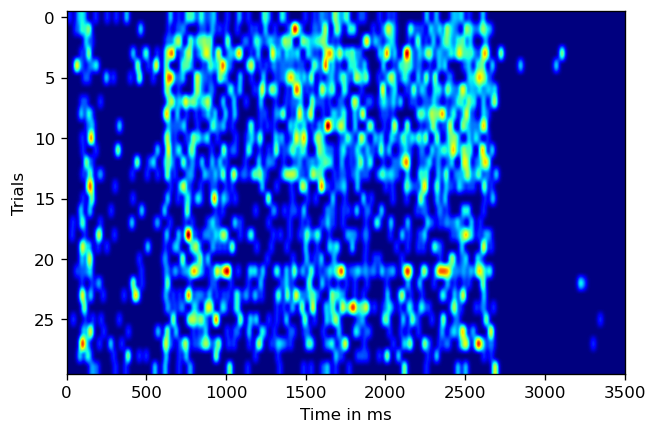

In [8]:
tstep = 1 # resolution for SDF 1 ms
sigma = 15 # standard deviation of gaussian is 10 ms
time_vec = np.array([x for x in range(0,3501,1)])
sum_gauss = np.zeros((len(time_vec)))
pop = np.zeros((trials,len(time_vec)))

for trial in range(trials):   # getting time steps where spiking occurred
    spikes = []
    for time_step in range(time):
        if six[trial][time_step] == 1:
            spikes.append(time_step)
    gauss = np.zeros((len(spikes),len(time_vec)))
    #print(len(gauss))
    i=0
    for spike in spikes:
        mu = spike #center the gaussian at the time of spike
        
        p1 = -0.5 * (((time_vec - mu)/sigma) ** 2)
        p2 = (sigma * (2* math.pi)**(0.5))
        gauss[i:] = (np.exp(p1))/p2
        i += 1
    sum_gauss1 = np.zeros((len(time_vec)))
    for spike in range(len(spikes)):
        sum_gauss += gauss[spike][:]
        sum_gauss1 += gauss[spike][:]
    pop[trial] += sum_gauss1
    
plt.figure(dpi=120)   
plt.plot(time_vec,sum_gauss)
plt.xlabel("Time in ms")
#plt.ylabel("Frequency")
#x = np.arange(sum_gauss.min(),sum_gauss.max())
#plt.yticks(x)

plt.figure(dpi=120)
plt.imshow(pop, cmap="jet", aspect="auto")
plt.xlabel("Time in ms")
plt.ylabel("Trials")
plt.show()

## Convolution Of Trial 10 with Box Car kernel

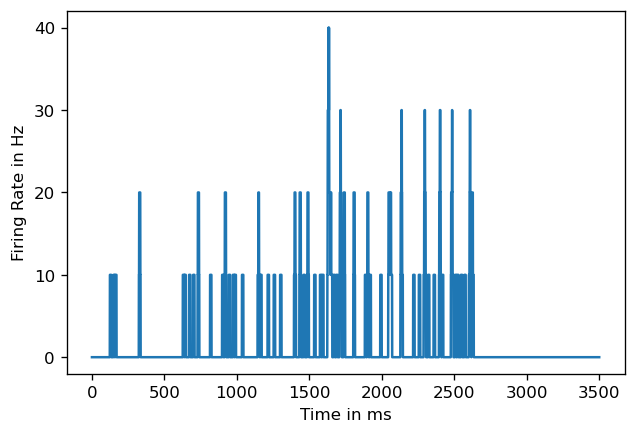

In [52]:
ten = six[9] #spike train of trial 10
box_car = np.array([0.1]*10)
convolution = np.convolve(ten, box_car, mode="same")

plt.figure(dpi=120)
plt.plot(time_vec[1:],convolution)
plt.xlabel("Time in ms")
plt.ylabel("Firing Rate in Hz")
labels = np.array([0,10,20,30,40])
plt.yticks([0.0,0.10,0.20,0.30,0.4],labels)
plt.show()

## Tuning Curve

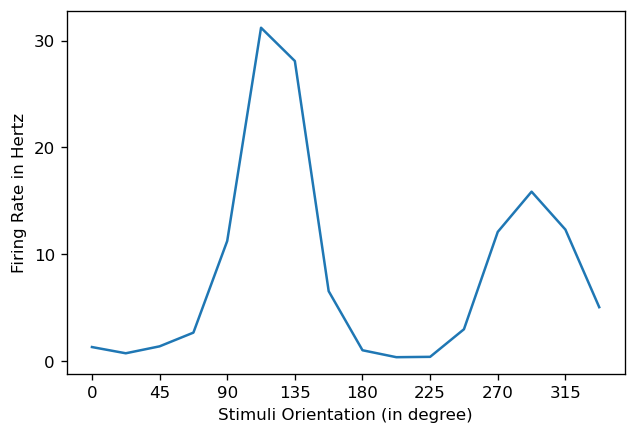

In [78]:
f = scipy.io.loadmat('dataSur.mat')

spikes = f["spikes"]
orientations = 18
time_steps = 3500 # in ms
num_trials = 30
start = 500 #stimuli start in ms
end = 2500 #stimuli end in ms
duration = end - start
avg_spikes=[0]*(orientations-2)

for orientation in range(orientations-2):
    orientation_spikes = 0
    for trial in range(num_trials):
        trial_spikes = 0
        for time in range(start,end+1):
            if spikes[orientation][time][trial] == 1:
                trial_spikes += 1
        trial_spikes = trial_spikes/duration
        orientation_spikes  += trial_spikes 
    orientation_spikes = orientation_spikes/num_trials
    avg_spikes[orientation] = orientation_spikes

plt.figure(dpi=120)
x = np.arange(0,360,22.5)
plt.plot(x,avg_spikes)
plt.xlabel("Stimuli Orientation (in degree)")
plt.ylabel("Firing Rate in Hertz")
labels = np.array([0,10,20,30])
plt.yticks([0.00,0.010,0.020,0.030],labels)
x1 = np.arange(0,360,45)
plt.xticks(x1)
plt.show()

## Average Firing rate for Grey Screen (No Stimuli)

In [85]:
f = scipy.io.loadmat('dataSur.mat')

spikes = f["spikes"]
orientations = 2
time_steps = 3500 # in ms
num_trials = 30
start = 0 #stimuli start in ms
end = 3500 #stimuli end in ms
duration = end - start
avg_spikes=[0]*(2)

for orientation in range(16,18):
    orientation_spikes = 0
    for trial in range(num_trials):
        trial_spikes = 0
        for time in range(start,end):
            if spikes[orientation][time][trial] == 1:
                trial_spikes += 1
        trial_spikes = trial_spikes/duration
        orientation_spikes  += trial_spikes 
    orientation_spikes = orientation_spikes/num_trials
    avg_spikes[orientation-16] = orientation_spikes

print("Average firing rates of stimulus 17 and 18 are", avg_spikes)
print("Average firing rates of blank stimulus is", (sum(avg_spikes))/2 )

Average firing rates of stimulus 17 and 18 are [0.0034857142857142856, 0.0028285714285714286]
Average firing rates of blank stimulus is 0.003157142857142857


## Adjusted Tuning Curve

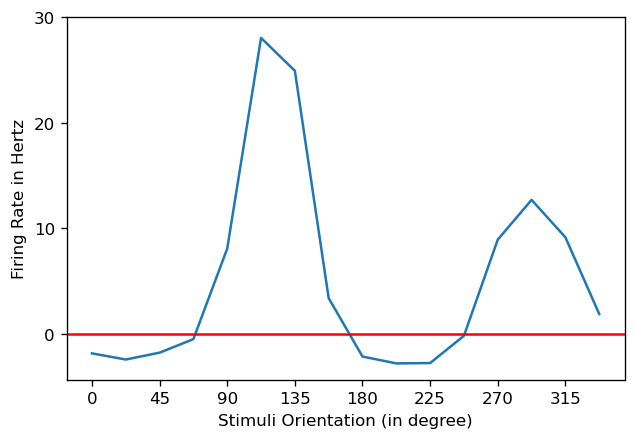

In [100]:
f = scipy.io.loadmat('dataSur.mat')

spikes = f["spikes"]
orientations = 18
time_steps = 3500 # in ms
num_trials = 30
start = 500 #stimuli start in ms
end = 2500 #stimuli end in ms
duration = end - start
avg_spikes=[0]*(orientations-2)

for orientation in range(orientations-2):
    orientation_spikes = 0
    for trial in range(num_trials):
        trial_spikes = 0
        for time in range(start,end+1):
            if spikes[orientation][time][trial] == 1:
                trial_spikes += 1
        trial_spikes = trial_spikes/duration
        orientation_spikes  += trial_spikes 
    orientation_spikes = orientation_spikes/num_trials
    avg_spikes[orientation] = orientation_spikes
    
#print(avg_spikes)
avg_spikes =[x- 0.003157142857142857 for x in avg_spikes]
#print(avg_spikes)

plt.figure(dpi=120)
x = np.arange(0,360,22.5)
plt.plot(x,avg_spikes)
plt.xlabel("Stimuli Orientation (in degree)")
plt.ylabel("Firing Rate in Hertz")
labels = np.array([0,10,20,30])
plt.yticks([0.00,0.010,0.020,0.030],labels)
x1 = np.arange(0,360,45)
plt.xticks(x1)
plt.axhline(y=0, color="r")
plt.show()